In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator , array_to_img , img_to_array , load_img
import matplotlib.pyplot as plt

In [8]:
# Instanciamos un objeto de un generador de imagenes que es el que se va a encargar de hacer modificaciones a las imagenes
# esto con elproposito de asi tener mas imagenes con caracteristicas similares y con esto lograr un mejor rendimiento

datagen = ImageDataGenerator(rotation_range=40 , # → Rota la imagen hasta 40° en ambas direcciones.
                            width_shift_range = 0.2, # → Desplaza la imagen horizontalmente hasta un 20% del ancho.
                            height_shift_range=0.2,# → Desplaza la imagen verticalmente hasta un 20% de la altura.
                            zoom_range=0.2, # → Aplica un zoom aleatorio de hasta un 20%.
                            horizontal_flip=True, # → Refleja la imagen horizontalmente.
                            fill_mode='nearest', # → Usa píxeles cercanos para rellenar áreas vacías después de transformaciones.
                            brightness_range=[0.4,1.5]  # → Ajusta el brillo de la imagen en el rango del 40% al 150% del original.
                           )

 #### Obtenemos una imgen y la transformamos en array

In [7]:
img = load_img ('/kaggle/input/cnn-data-sources/Mara.jpeg')
x = img_to_array(img) # conversor de imagen a array
print(x.shape)
x = x.reshape((1,) + x.shape) # estructuramos de la forma que keras recibe la imagn
print(x.shape) #(1 la cantidad de imagenes de 800 x 600 con 3 canales ose R G B )

(800, 600, 3)
(1, 800, 600, 3)


#### Data generator basado en in directorio

In [ ]:
i = 0 
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 10 == 0 :
        break
plt.show()    

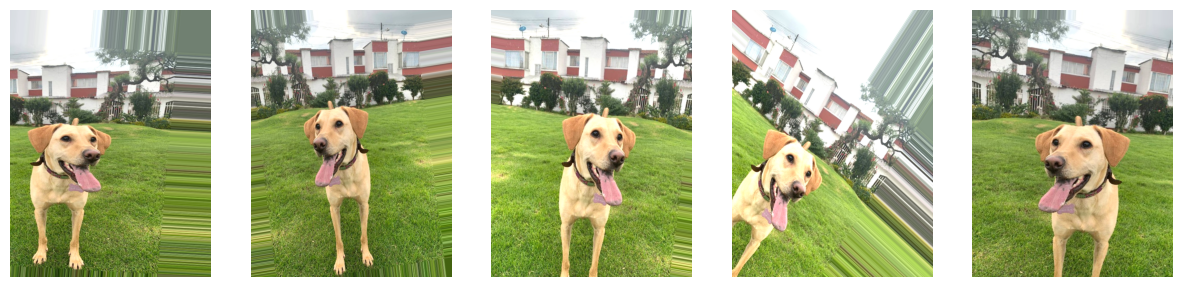

In [9]:
# Generar imágenes aumentadas
gen = datagen.flow(x, batch_size=1)

# Mostrar 5 imágenes aumentadas
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    batch = next(gen)  # Genera una imagen nueva
    ax[i].imshow(batch[0].astype('uint8'))  # Mostrar imagen
    ax[i].axis('off')

plt.show()

 ¿Por qué batch[0]?
 
Como batch_size=1, el lote generado contiene una sola imagen, pero aún así el resultado es un array con una dimensión extra:
batch.shape  # (1, altura, ancho, canales)
Para extraer esa imagen individualmente, accedemos a batch[0], que elimina la dimensión extra y nos deja con la imagen de forma (altura, ancho, canales), lista para ser visualizada o usada en el modelo.

### Ahora obtenemos la imagenes de un directorio en espesifico

In [12]:
train_generator = datagen.flow_from_directory(
'../input/cnn-data-sources/cats_and_dogs/train',
    target_size=(150,150), # pase las imagenes de 150 x 150
    batch_size=32, # por lotes de 32
    class_mode='binary' # Es binary porque es un modelo de clasificacion binarioa ose es PERRO o GATO
)

Found 2000 images belonging to 2 classes.


#### ¿Qué información trae train_generator?

📌 Forma general de train_generator
Este generador produce datos en forma de tuplas (X, y), donde:

X es un lote de imágenes procesadas con forma (batch_size, 150, 150, 3).
y son las etiquetas correspondientes a esas imágenes (0 = gato, 1 = perro).

In [19]:
# dimensio del primer lote
train_generator[0][0]

array([[[[ 54.,  49.,  46.],
         [ 48.,  40.,  30.],
         [118., 107.,  89.],
         ...,
         [143., 126., 114.],
         [144., 126., 114.],
         [142., 124., 112.]],

        [[ 55.,  48.,  45.],
         [ 81.,  71.,  61.],
         [123., 110.,  92.],
         ...,
         [138., 120., 108.],
         [134., 117., 105.],
         [131., 114., 102.]],

        [[ 60.,  52.,  46.],
         [ 77.,  64.,  54.],
         [106.,  90.,  72.],
         ...,
         [133., 115., 103.],
         [135., 117., 105.],
         [137., 120., 108.]],

        ...,

        [[102.,  92.,  80.],
         [102.,  92.,  80.],
         [103.,  93.,  82.],
         ...,
         [130., 108.,  95.],
         [117.,  95.,  82.],
         [117.,  95.,  81.]],

        [[103.,  94.,  83.],
         [104.,  95.,  84.],
         [104.,  95.,  84.],
         ...,
         [129., 107.,  93.],
         [122., 100.,  86.],
         [116.,  94.,  80.]],

        [[104.,  95.,  85.],
       

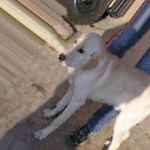

In [20]:
array_to_img(train_generator[0][0][0])

(32, 150, 150, 3)
(32,)


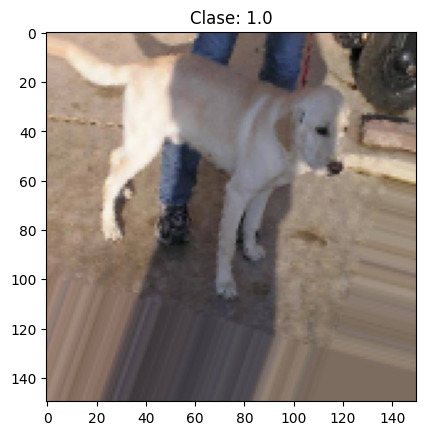

In [14]:
batch = next(train_generator)  # Obtiene un lote de 32 imágenes y etiquetas
X, y = batch  # Separa imágenes (X) y etiquetas (y)

print(X.shape)  # (32, 150, 150, 3) → 32 imágenes RGB de 150x150 píxeles
print(y.shape)  # (32,) → 32 etiquetas binarias (0 o 1)

# Mostrar una imagen del lote
import matplotlib.pyplot as plt
plt.imshow(X[0].astype('uint8')) # Extrae la primera imagen del lote
plt.title(f'Clase: {y[0]}')  # 0 = gato, 1 = perro
plt.show()